In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

plt.rcParams['figure.figsize'] = (10,6)

# Reinforcement learning: Multi armed bandit

## Model 

In [3]:
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

reward(0.5)

4

In [3]:
# based on a vector containing the arms number and corresponding reward as 2 columns
# this function returns which arm is currently the best
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

# this function runs the reinforcement algorithm and produce one figure with 3 plots
def multi_armed_bandit(n_arms=10, eps=0.1, n_steps = 100):
    
    np.random.seed(5)

    arms = np.random.rand(n_arms) # define the probability to win of each arms
    print(arms)
    av = np.array([np.random.randint(0,(n_arms+1)), 0]).reshape(1,2)
    
    plt.figure(figsize=(12,8))
    ax = plt.subplot(2,2,1)

    plt.ylabel("Average Reward")
    
    for i in range(n_steps):
    
        if random.random() > eps: #greedy exploitation action
            choice = bestArm(av)
        else: #exploration action
            choice = np.where(arms == np.random.choice(arms))[0][0]
            
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        #calculate the mean reward
        runningMean = np.mean(av[:,1])
        ax.scatter(i, runningMean) # to see how reward is maximized over trials
    
    ax = plt.subplot(2,2,2)
    ax.scatter(av[:,0], np.random.random(len(av)), alpha=50/len(av)) # to visualize which arm is the best
    plt.xlabel("Arms ID")
    
    ax = plt.subplot(2,2,3)
    ax.scatter(np.arange(len(av)), av[:,1], alpha = 100/len(av)) # to visualize how reward evolve with trials
    plt.xlabel("Number of times played")
    plt.ylabel("Arms ID")

    ax = plt.subplot(2,2,4)
    ax.hist(av[:,0]) # to visualize how reward evolve with trials
    plt.xlabel("Arms ID")
    plt.ylabel("count")
    
    plt.show()

## Playing with the model

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


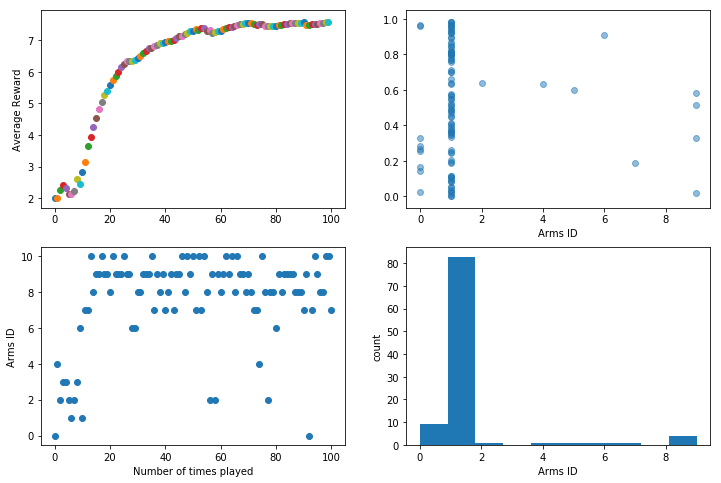

In [18]:
multi_armed_bandit()

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


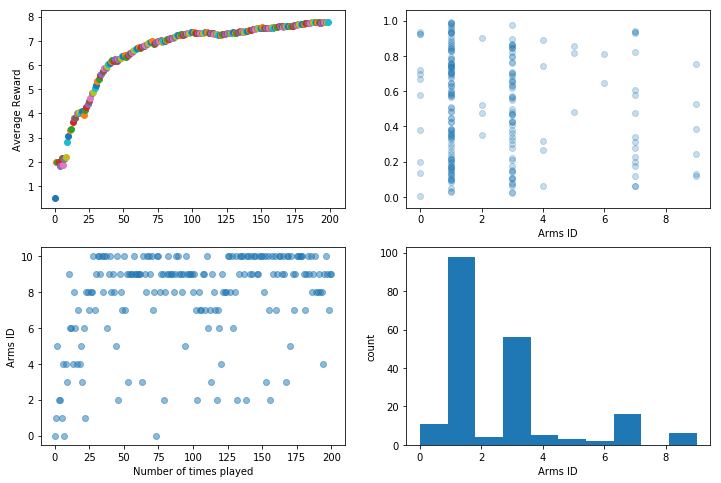

In [10]:
multi_armed_bandit(n_steps = 200)

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


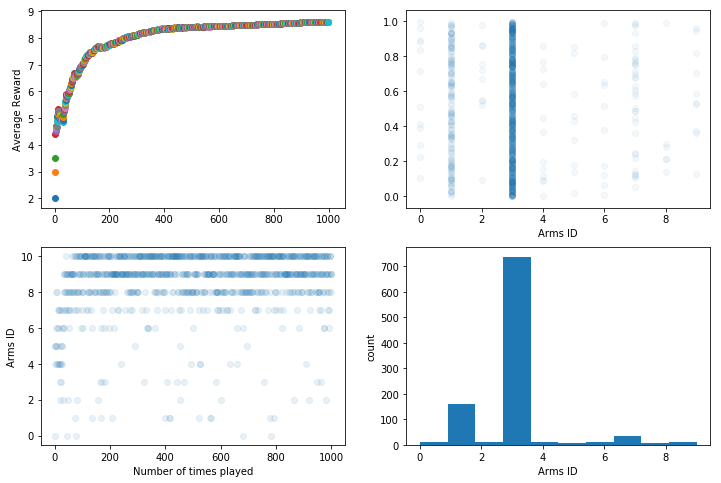

In [11]:
multi_armed_bandit(n_steps = 1000)

### Effect of eps

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


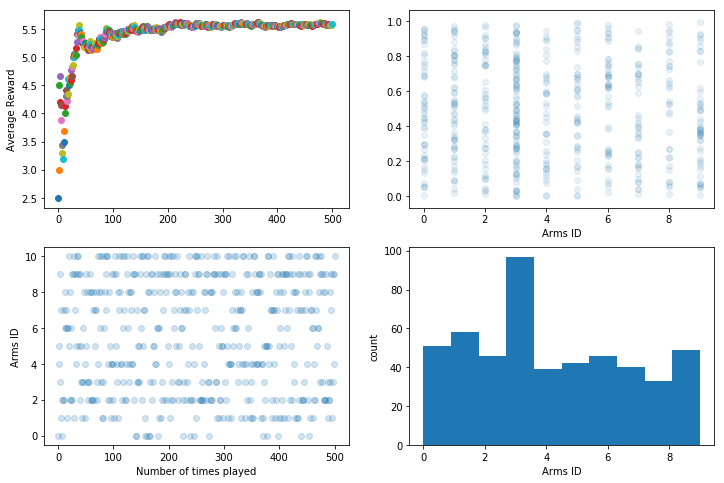

In [12]:
multi_armed_bandit(n_steps = 500,eps = 0.9)

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


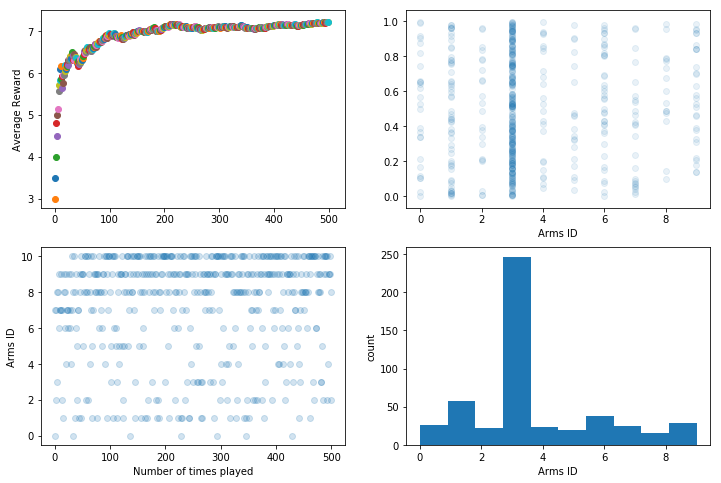

In [13]:
multi_armed_bandit(n_steps = 500,eps = 0.5)

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


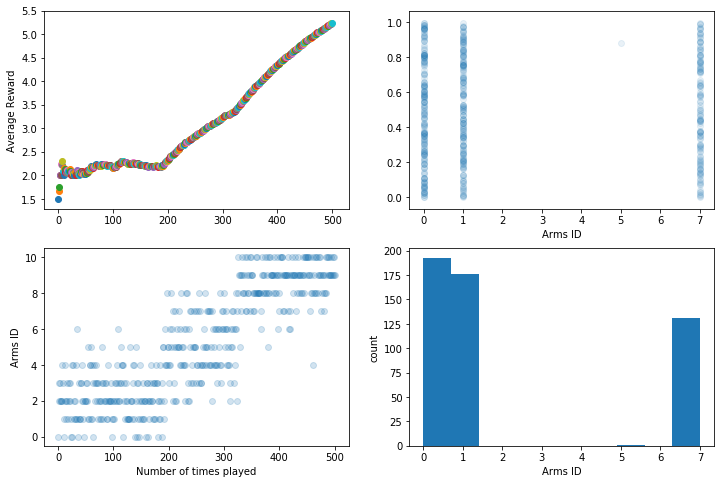

In [14]:
multi_armed_bandit(n_steps = 500,eps = 0.01)